In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

from dataset import Dataset

In [2]:
DATA_DIR = os.path.abspath("adsp-data/494_bus")
d = Dataset(DATA_DIR)
X = d.df

OSError: [Errno 9] Bad file descriptor: 'C:\\Work\\School\\Coding\\GitHub\\uml-hpc3_test\\adsp-inference\\adsp-data\\494_bus\\494_bus_gauss_0.00_0.00.mtx_2.json'

In [ ]:
# X.to_excel("dataframe_494_bus_with_index.xlsx", index=True)

In [3]:
X = pd.read_excel("dataframe_494_bus_with_index.xlsx", index_col=0)
X

,branch-instructions,branch-misses,bus-cycles,cache-misses,unc_c_ring_ak_used.up_even,unc_c_ring_ak_used.up_odd,unc_c_ring_bl_used.all,l2_rqsts.all_demand_references,l2_rqsts.all_pf,l2_rqsts.all_rfo,...,l2_lines_out.demand_clean,unc_c_ring_ak_used.all,unc_c_ring_ak_used.down,unc_c_ring_ak_used.down_even,unc_c_ring_ak_used.down_odd,l2_lines_out.demand_dirty,l2_rqsts.all_code_rd,l2_rqsts.all_demand_data_rd,l2_rqsts.all_demand_miss,unc_c_ring_ak_used.up
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1_0.06,250863429.5,332837.0,139218547.0,971695.5,27479690.1,24812467.2,123566719.2,2762965,5044125,1009405,...,2772113,136396155.9,83062217.7,36782333.1,46864140.0,25273,257743,1475990,2084802,53369201.7
0.1_0.07,243935316.0,332224.5,138084503.5,979994.0,28601909.5,24697362.5,125034216.5,2733947,4943392,1010497,...,2706935,136114357.4,84179052.7,37262142.1,47588735.4,42807,244875,1484210,2097834,52977104.1
0.1_0.08,250330380.0,331117.0,141210890.0,980939.5,28484942.1,24910258.1,122295079.3,2726120,4970150,1003911,...,2770895,137341151.5,84247285.9,36585310.5,46773550.6,37571,245023,1470336,2085445,52830541.1
0.1_0.09,257758261.5,333472.5,139637622.0,978840.0,28405114.9,25391065.6,122181270.4,2719340,4965523,1003700,...,2744895,136099410.0,83997180.6,36323451.0,46507653.2,25706,257035,1493277,2097495,53712902.3


In [4]:
y = np.array([float(i.split("_")[0]) * 100 for i in X.index])
y_binary = np.where(y == 0, 0, 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.33, random_state=22)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
input_dim = X_train_scaled.shape[1]
encoding_dim = 64

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=10, batch_size=32, verbose=0)

X_train_encoded = encoder.predict(X_train_scaled)
X_test_encoded = encoder.predict(X_test_scaled)

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_encoded, y_train)
y_pred_ae = clf.predict(X_test_encoded)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [8]:
acc = accuracy_score(y_test, y_pred_ae)
precision = precision_score(y_test, y_pred_ae)
recall = recall_score(y_test, y_pred_ae)
f1 = f1_score(y_test, y_pred_ae)

🔹 Autoencoder + Logistic Regression
Accuracy:  0.9697
Precision: 1.0000
Recall:    0.9375
F1 Score:  0.9677


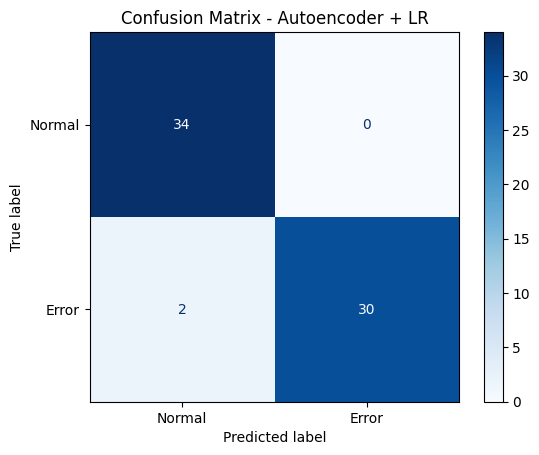

In [9]:
print("🔹 Autoencoder + Logistic Regression")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_ae)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Error"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Autoencoder + LR")
plt.show()

In [10]:
X_train_cnn = X_train_scaled[..., np.newaxis]
X_test_cnn = X_test_scaled[..., np.newaxis]

In [12]:
cnn = Sequential()
cnn.add(Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn.add(MaxPooling1D(2))
cnn.add(Flatten())
cnn.add(Dense(64, activation='relu'))
cnn.add(Dropout(0.3))
cnn.add(Dense(1, activation='sigmoid'))

cnn.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train_cnn, np.array(y_train), epochs=10, batch_size=32, verbose=0)

y_pred_cnn = cnn.predict(X_test_cnn)
y_pred_cnn_binary = (y_pred_cnn > 0.5).astype(int).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [13]:
acc = accuracy_score(y_test, y_pred_cnn_binary)
precision = precision_score(y_test, y_pred_cnn_binary)
recall = recall_score(y_test, y_pred_cnn_binary)
f1 = f1_score(y_test, y_pred_cnn_binary)

🔹 CNN Classifier
Accuracy:  0.9848
Precision: 1.0000
Recall:    0.9688
F1 Score:  0.9841


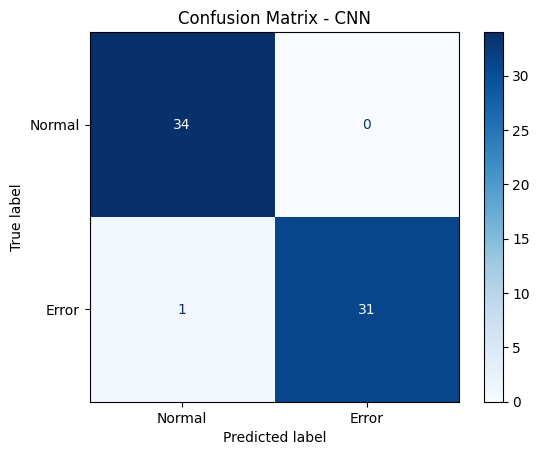

In [14]:
print("🔹 CNN Classifier")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

cm = confusion_matrix(y_test, y_pred_cnn_binary)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal", "Error"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - CNN")
plt.show()